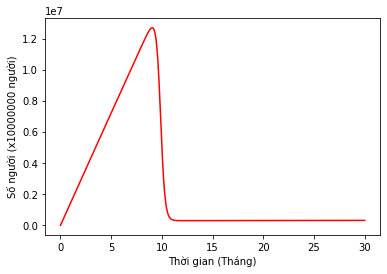

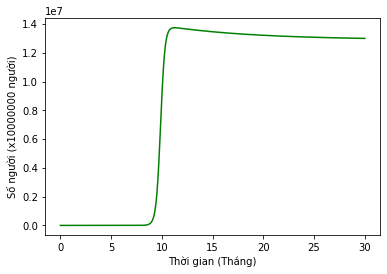

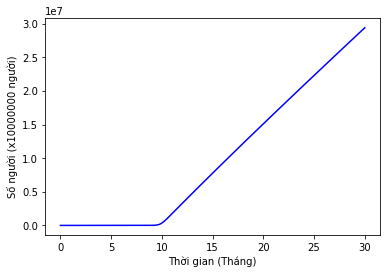

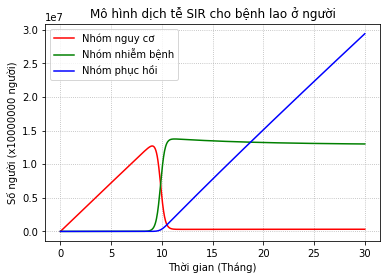

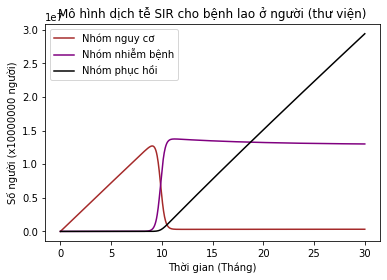

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from numpy import zeros, linspace
import matplotlib.pyplot as plt

# Lập trình trên python

#Các biến giả định
r = 0.5 
a = 0.111111
mu = 0.001167
h = 0.033                  
D = 30                       
N_t = int(D/h)    
t=linspace(0,N_t*h,N_t+1)
#Ma trận giá trị theo thời gian từng nhóm
S=zeros(N_t+1)
I=zeros(N_t+1)
R=zeros(N_t+1)

#Các giá trị đầu vào
A = 1449401
N = 1449401
S[0]= 1446093/A
I[0]= 1885/A
R[0]= 1423/A

#Vòng lập phương pháp RK4
for n in range(N_t):
    k1 = A - mu*S[n] - r/N*I[n]*S[n]
    l1 = r/N*I[n]*S[n] - (mu + a)*I[n]
    m1 = a*I[n] - mu*R[n]
    
    k2 = A - mu*(S[n] + 0.5*k1*h) - r/N*(I[n]+ 0.5*l1*h)*(S[n] + 0.5*k1*h)
    l2 = r/N*(I[n] + 0.5*l1*h)*(S[n] + 0.5*k1*h) - (mu + a)*(I[n] + 0.5*l1*h)
    m2 = a*(I[n] + 0.5*l1*h) - mu*(R[n] + 0.5*m1*h)
    
    k3 = A - mu*(S[n] + 0.5*k2*h) - r/N*(I[n]+ 0.5*l2*h)*(S[n] + 0.5*k2*h)
    l3 = r/N*(I[n] + 0.5*l2*h)*(S[n] + 0.5*k2*h) - (mu + a)*(I[n] + 0.5*l2*h)
    m3 = a*(I[n] + 0.5*l2*h) -mu*(R[n] + 0.5*m2*h)
    
    k4 = A - mu*(S[n] + k3*h) - r/N*(I[n]+ l3*h)*(S[n] + k3*h)
    l4 = r/N*(I[n] + l3*h)*(S[n] + k3*h) - (mu + a)*(I[n] + l3*h)
    m4 = a*(I[n] + l3*h) -mu*(R[n] + m3*h)
    
    k = (k1 + 2*k2 + 2*k3 +k4)*h/6
    l = (l1 + 2*l2 + 2*l3 +l4)*h/6
    m = (m1 + 2*m2 + 2*m3 +m4)*h/6
    
    S[n+1] = S[n] + k
    I[n+1] = I[n] + l 
    R[n+1] = R[n] + m
    
#Biểu diễn kết quả theo thời gian bằng đồ thị    
plt.plot(t, S,color='r', label='Nhóm nguy cơ')
plt.xlabel('Thời gian (Tháng)')
plt.ylabel('Số người (x10000000 người)')
plt.show()
plt.plot(t,I,color='green', label='Nhóm nhiễm bệnh')
plt.xlabel('Thời gian (Tháng)')
plt.ylabel('Số người (x10000000 người)')
plt.show()
plt.plot(t,R,color='blue', label='Nhóm phục hồi')
plt.xlabel('Thời gian (Tháng)')
plt.ylabel('Số người (x10000000 người)')
plt.show()
plt.plot(t, S,color='r', label='Nhóm nguy cơ')
plt.plot(t,I,color='green', label='Nhóm nhiễm bệnh')
plt.plot(t,R,color='blue', label='Nhóm phục hồi')
plt.legend()
plt.grid(True,linestyle=':')
plt.title('Mô hình dịch tễ SIR cho bệnh lao ở người')
plt.xlabel('Thời gian (Tháng)')
plt.ylabel('Số người (x10000000 người)')
plt.show()


# Sử dụng thư viện để so sánh

#Phương trình của dịch tể SIR With Vital Dynamics
def SIR(time, z):
    S, I, R, = z
    return [A - mu*S - r/N*I*S, r/N*I*S - (mu + a)*I, a*I - mu*R]


thoigian = [0,N_t]
giatridau = [S[0],I[0],R[0]]
#Sử dụng gói solve_ivp trong thư viện scipy
sol = solve_ivp(SIR, thoigian, giatridau, dense_output=True)

z = sol.sol(t)

plt.plot(t,z[0], color='brown', label='Nhóm nguy cơ')
plt.plot(t,z[1], color='purple', label='Nhóm nhiễm bệnh')
plt.plot(t,z[2], color='black', label='Nhóm phục hồi')
plt.ylabel('Số người (x10000000 người)')
plt.xlabel('Thời gian (Tháng)')
plt.legend()
plt.title('Mô hình dịch tễ SIR cho bệnh lao ở người (thư viện)')
plt.show()